In [130]:
import numpy as np
np.set_printoptions(threshold=np.nan)

from astropy.io import fits
from astropy.units import degree, kpc
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

import plotly
import plotly.plotly as py
from plotly.offline import plot, iplot
import plotly.graph_objs as go

from matplotlib import pyplot as plt
import matplotlib.cm as cm

import pandas as pd

In [3]:
data = fits.open('delta_transmission_RMplate_old.fits')
len(data)

1247

### Data Model

**PrimaryHDU**

In [4]:
data[0]

In [5]:
data[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 

**BinaryTableHDU**

In [6]:
data[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   24 / width of table in bytes                        
NAXIS2  =                 3466 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3 / number of fields in each row                   
TTYPE1  = 'LAMBDA  '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 'Angstrom'           / physical unit of field                         
TTYPE2  = 'DELTA_T '           / label for field   2                            
TFORM2  = 'D       '        

In [76]:
for i in range(2, len(data)):
    print(data[i].data['RCOMOV'].shape)

(3495,)
(3539,)
(3547,)
(3518,)
(3601,)
(3610,)
(3583,)
(3640,)
(3569,)
(3495,)
(3594,)
(3655,)
(3426,)
(3639,)
(3628,)
(3655,)
(3343,)
(3204,)
(2744,)
(3002,)
(2982,)
(3033,)
(3035,)
(3030,)
(3066,)
(3026,)
(2997,)
(3072,)
(3072,)
(3073,)
(3163,)
(3079,)
(3173,)
(3055,)
(3117,)
(3066,)
(3074,)
(3134,)
(3201,)
(3136,)
(3192,)
(3256,)
(3256,)
(3201,)
(3265,)
(3169,)
(3259,)
(3187,)
(3195,)
(3282,)
(3281,)
(3230,)
(3296,)
(3215,)
(3341,)
(3348,)
(3310,)
(3374,)
(3327,)
(3367,)
(3388,)
(3464,)
(3406,)
(1571,)
(1550,)
(1574,)
(1295,)
(1922,)
(1732,)
(1750,)
(1897,)
(1379,)
(1907,)
(1899,)
(1843,)
(1648,)
(2199,)
(2099,)
(1910,)
(2077,)
(1792,)
(2286,)
(2214,)
(2379,)
(2387,)
(2476,)
(2258,)
(2383,)
(2265,)
(2278,)
(2272,)
(2788,)
(2615,)
(2226,)
(2775,)
(2249,)
(2781,)
(2813,)
(2801,)
(2807,)
(2615,)
(2593,)
(2772,)
(2809,)
(2807,)
(2824,)
(2847,)
(2836,)
(2836,)
(2841,)
(2840,)
(2848,)
(2821,)
(2843,)
(2843,)
(2824,)
(2825,)
(2851,)
(2853,)
(2870,)
(2910,)
(2826,)
(2918,)
(2860,)
(2920,)


In [8]:
data[1].data['DELTA_T']

array([ 3.20419816e-01,  3.28204523e-01,  3.22275494e-01,  3.07203922e-01,
        3.22576044e-01,  3.74253727e-01,  4.14484667e-01,  4.37799073e-01,
        4.45721647e-01,  4.20818676e-01,  4.06719336e-01,  4.24879262e-01,
        4.42686609e-01,  4.57770267e-01,  4.61713417e-01,  3.77046120e-01,
        2.93486913e-01,  3.53026796e-01,  4.09813910e-01,  4.13800530e-01,
        4.09583809e-01,  4.13052455e-01,  4.16956692e-01,  4.06498186e-01,
        3.98327382e-01,  3.88339586e-01,  3.77699125e-01,  3.45038732e-01,
        3.09065872e-01,  2.81993566e-01,  2.60677554e-01,  2.31530740e-01,
        1.94479622e-01,  2.07514360e-01,  2.92964893e-01,  3.59358775e-01,
        3.85894056e-01,  3.94796940e-01,  3.53714713e-01,  3.29686250e-01,
        3.75317166e-01,  4.18075239e-01,  4.08215248e-01,  3.95757947e-01,
        3.87387692e-01,  3.79135835e-01,  3.69775185e-01,  3.60512590e-01,
        3.55983348e-01,  3.52192767e-01,  3.60840807e-01,  3.73024504e-01,
        3.83477827e-01,  

## 2D Visualization

### Extracting Coordinates from Header

In [9]:
ra_list = []
for i in range(1,len(data)):
    ra_list.append(data[i].header['RA'])
ras = np.array(ra_list)
ras.shape

(1246,)

In [10]:
dec_list = []
for i in range(1,len(data)):
    dec_list.append(data[i].header['DEC'])
decs = np.array(dec_list)
decs.shape

(1246,)

In [11]:
z_list = []
for i in range(1,len(data)):
    z_list.append(data[i].header['Z'])
zs = np.array(z_list)
zs.shape

(1246,)

In [88]:
rcomov_list = []
deltat_list = []
avg_deltat = []
for i in range(1,len(data)):
    rcomov_list.append(data[i].data['RCOMOV'])
    deltat_list.append(data[i].data['DELTA_T'])
    avg_deltat.append(data[i].data['DELTA_T'].mean())

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning:

Mean of empty slice.

/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning:

invalid value encountered in double_scalars



### Building Coordinate Systems

In [12]:
quasar_2d = SkyCoord(ra=ras*degree, dec=decs*degree, distance=zs*kpc, frame='icrs')
quasar_2d.shape

(1246,)

###  Astronomical Coordinate Systems - Equatorial

In [13]:
ra = quasar_2d[:].ra.value

In [14]:
dec = quasar_2d[:].dec.value

In [15]:
dis1 = quasar_2d[:].distance.value

In [16]:
rel_dis1 = dis1/dis1.max()

In [17]:
color1 = np.zeros((quasar_2d.shape[0], 4))
color1[:,3] = rel_dis1

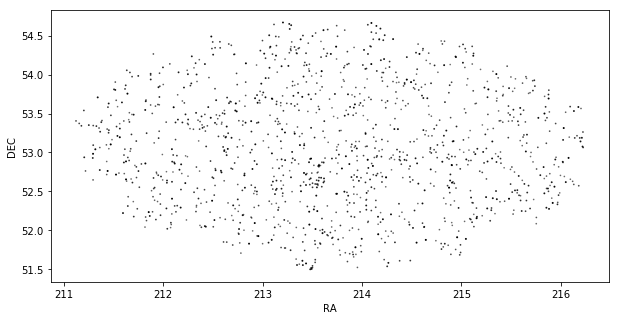

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(ra, dec, s=rel_dis1, c=color1)
# plt.scatter(lon2, lat2, s=0.5, c='k')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

###  Astronomical Coordinate Systems - Galactic

In [19]:
quasar_galactic = quasar_2d.galactic
quasar_galactic.shape

(1246,)

In [20]:
lon = quasar_galactic[:].l.value

In [21]:
lat = quasar_galactic[:].b.value

In [22]:
dis2 = quasar_galactic[:].distance.value

In [23]:
rel_dis2 = dis2/dis2.max()

In [24]:
color2 = np.zeros((quasar_galactic.shape[0], 4))
color2[:,3] = rel_dis2

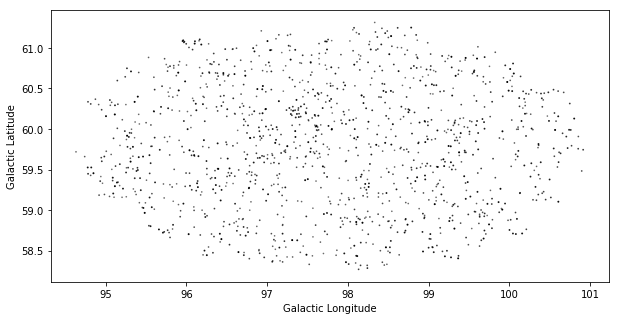

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(lon, lat, s=rel_dis2, c=color2)
# plt.scatter(lon2, lat2, s=0.5, c='k')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
plt.show()

### Cartesian Coordinate System

In [26]:
quasar_cartesian = quasar_2d.cartesian
quasar_cartesian.shape

(1246,)

In [27]:
x = quasar_cartesian[:].x.value

In [28]:
y = quasar_cartesian[:].y.value

In [29]:
z = quasar_cartesian[:].z.value

In [30]:
rel_z = z/z.max()

In [31]:
color3 = np.zeros((quasar_cartesian.shape[0], 4))
color3[:,3] = rel_z

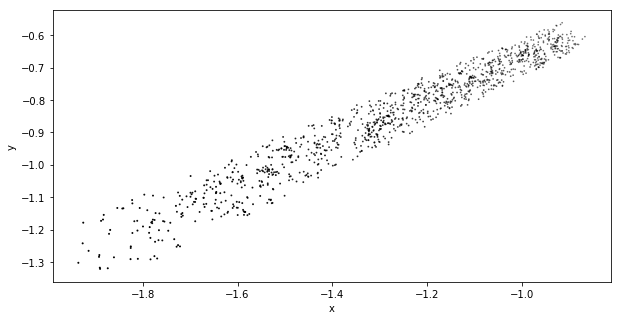

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(x, y, s=rel_z, c=color3)
# plt.scatter(lon2, lat2, s=0.5, c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 3D Visualization

In [122]:
def GetSkyCoord(data):
    ra = data.header['RA']
    dec = data.header['DEC']
    depth = data.data['RCOMOV']
    field = data.data['DELTA_T']
    sc = SkyCoord(ra=ra*degree, dec=dec*degree, distance=depth*kpc, frame='icrs')
    return sc, field

In [123]:
data3d = []

In [125]:
for i in range(1,len(data)):
    sc, field = GetSkyCoord(data[i])
    trace = go.Scatter3d(
        x=sc.ra.value[::5],
        y=sc.dec.value[::5],
        z=sc.distance.value[::5],
        mode='markers',
        marker=dict(
            size=1,
            color=field[::5],
            opacity=0.1
        )
    )
    data3d.append(trace)

In [126]:
layout3d = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
)

In [127]:
fig = go.Figure(data=data3d, layout=layout3d)

In [128]:
plot(fig, filename='3dEquatorial')

/Applications/anaconda3/lib/python3.6/site-packages/plotly/offline/offline.py:654: UserWarning:

Your filename `3dEquatorial` didn't end with .html. Adding .html to the end of your file.



'file:///Users/yulong/Codes/astro-void/visualization/3dEquatorial.html'

## Average Delta T

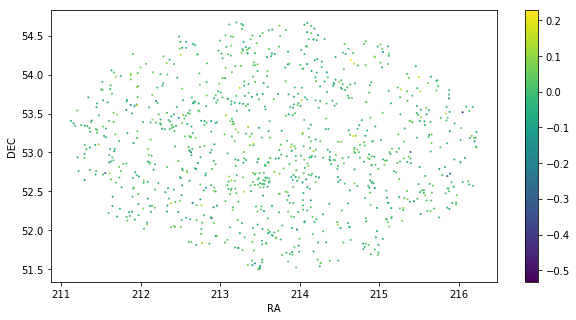

In [196]:
plt.figure(figsize=(10,5))
sc = plt.scatter(ras, decs, s=1, c=avg_deltat, cmap=cm.get_cmap('viridis'))
plt.colorbar(sc)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

## Value Trend

In [197]:
dfs = []
for i in range(len(ras)):
    df = pd.DataFrame({'ra': ras[i], 'dec': decs[i], 'rcomov': rcomov_list[i], 'deltat': deltat_list[i]})
    dfs.append(df)

In [198]:
table = pd.concat(dfs)
table.shape

(2433528, 4)

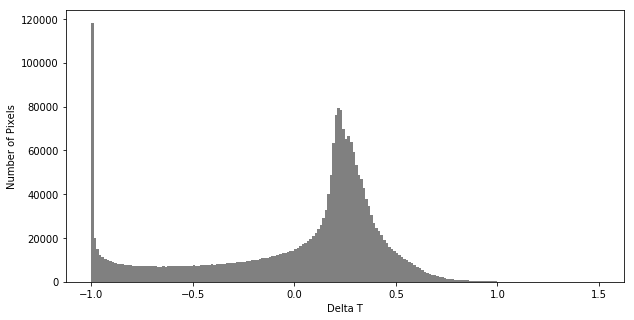

In [214]:
plt.figure(figsize=(10,5))
plt.hist(table['deltat'], bins=200, color='grey')
plt.xlabel('Delta T')
plt.ylabel('Number of Pixels')
plt.show()

In [202]:
table['rcomov'] = table['rcomov'].apply(lambda x: int(x))

In [203]:
grouped = table.groupby('rcomov')

In [204]:
trend = grouped.mean().drop(columns=['ra', 'dec'])

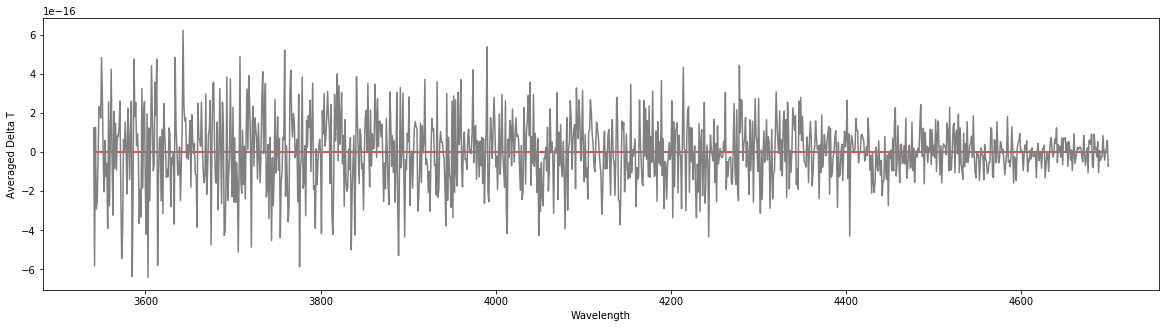

In [215]:
plt.figure(figsize=(20,5))
plt.plot(trend, c='grey')
plt.hlines(y=0, xmin=trend.index.min(), xmax=trend.index.max(), colors='red')
plt.xlabel('Wavelength')
plt.ylabel('Averaged Delta T')
plt.show()